<a href="https://colab.research.google.com/github/Saniru2006/Churn_Test/blob/main/CM2604_2425606_PreTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install required packages
!pip install pandas-profiling
!pip install scikit-learn
!pip install imbalanced-learn

#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)
from imblearn.over_sampling import SMOTE
from scipy import stats

#Set visualization styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("All libraries imported successfully")

  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Load the dataset
print("Loading Telco Customer Churn Dataset")
file_path = '/content/drive/MyDrive/Colab Notebooks/CM2604_ML_ICW_Test/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print("\nDataset loaded successfully")

("Shape: " + str(df.shape))
("Number of customers: " + str(df.shape[0]))
("Number of features: " + str(df.shape[1]))

#Display basic information
("\nFirst 5 rows of the dataset: ")
(df.head())

("\nDataset Information: ")
(df.info())

("\nColumn names: ")
(df.columns.tolist())

("\nBasic Statistics: ")
(df.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading Telco Customer Churn Dataset

Dataset loaded successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   o

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
#Data Validation

#Missing Values
("Missing Values: ")
df.isnull().sum()
("\nMissing Values Percentage: ")
df.isnull().sum()/len(df)*100


#Duplicate Values
("Duplicate Values: ")
df.duplicated().sum()
if df.duplicated().sum() == 0:
    print("\nNo duplicate values found")

#Data Types
("Data Types: ")
df.dtypes

#Check for constant columns
("Constant Columns: ")
constant_columns = df.columns[df.nunique() == 1]
print(constant_columns)

#Check for infinite values in numeric columns
("Infinite Values: ")
numeric_cols = df.select_dtypes(include=[np.number]).columns
infinite_values = df[numeric_cols][np.isinf(df[numeric_cols]).any(axis=1)]
print(infinite_values)


No duplicate values found
Index([], dtype='object')
Empty DataFrame
Columns: [SeniorCitizen, tenure, MonthlyCharges]
Index: []


In [4]:
#Clean and Preprocess the dataset

#Make a copy of the dataset
df_clean = df.copy()

#Handle the TotalCharges column
("Converting TotalCharges to numeric: ")
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

#Check for missing values after convertion
("Missing values after convertion: ")
df_clean['TotalCharges'].isnull().sum()

#Fill missing TotalCharges with 0 (new customers)
if df_clean['TotalCharges'].isnull().sum() > 0:
    df_clean['TotalCharges'].fillna(0, inplace=True)
    ("Missing values filled with 0")

#Remove customerID for privacy
("Removing customerID: ")
df_clean.drop('customerID', axis=1, inplace=True)

#Remove duplicates if any
("Removing duplicates: ")
if df_clean.duplicated().sum() > 0:
    df_clean.drop_duplicates(inplace=True)

("Shape of the Original Dataset: ")
(df.shape)
("Shape of the Cleaned Dataset: ")
(df_clean.shape)

(7021, 20)

 No Churn:  5,164 customers (73.6%)
 Churn:  1,857 customers (26.4%)
 Imbalance Ratio: 2.8:1


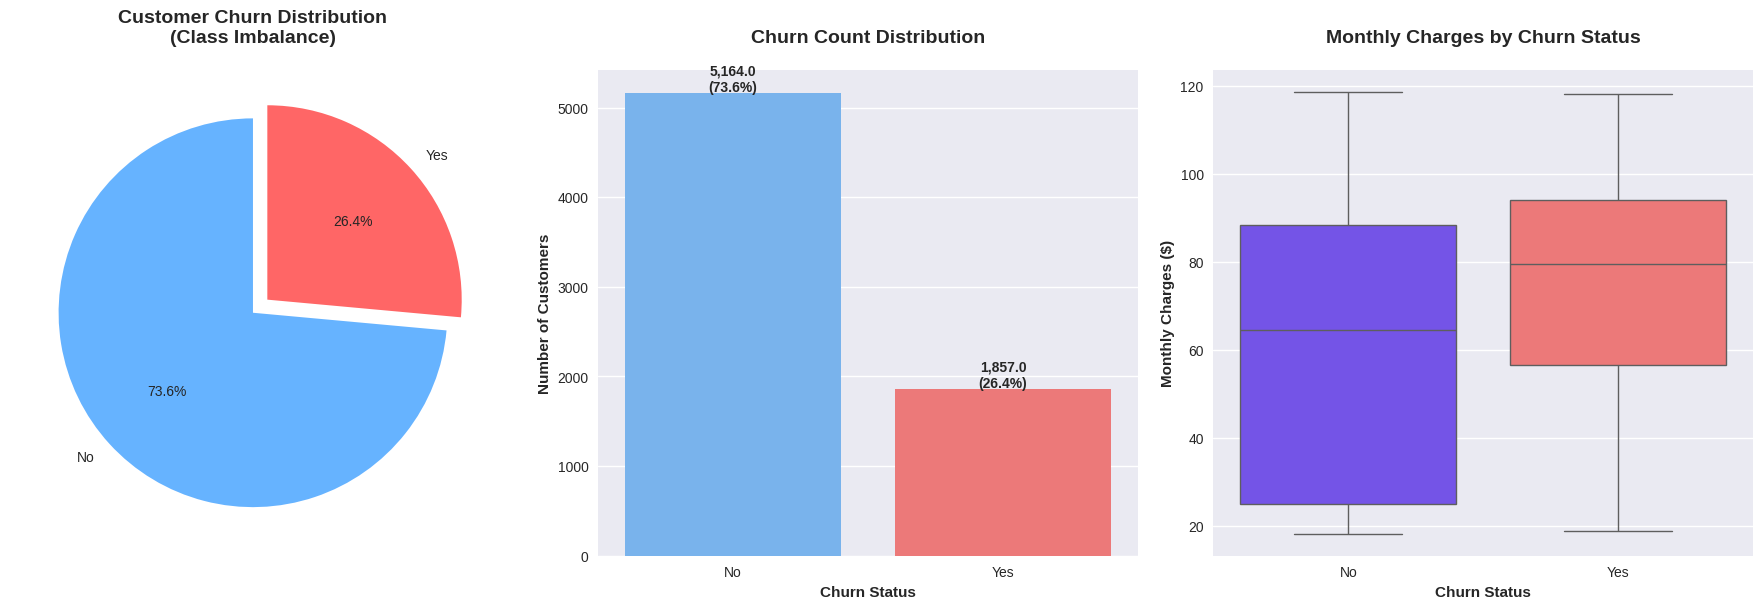

,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000
mean,32.469449,64.851894,2286.765026
std,24.534965,30.069001,2266.855057
min,0.000000,18.250000,0.000000
25%,9.000000,35.750000,403.350000
50%,29.000000,70.400000,1400.550000
75%,55.000000,89.900000,3801.700000
max,72.000000,118.750000,8684.800000


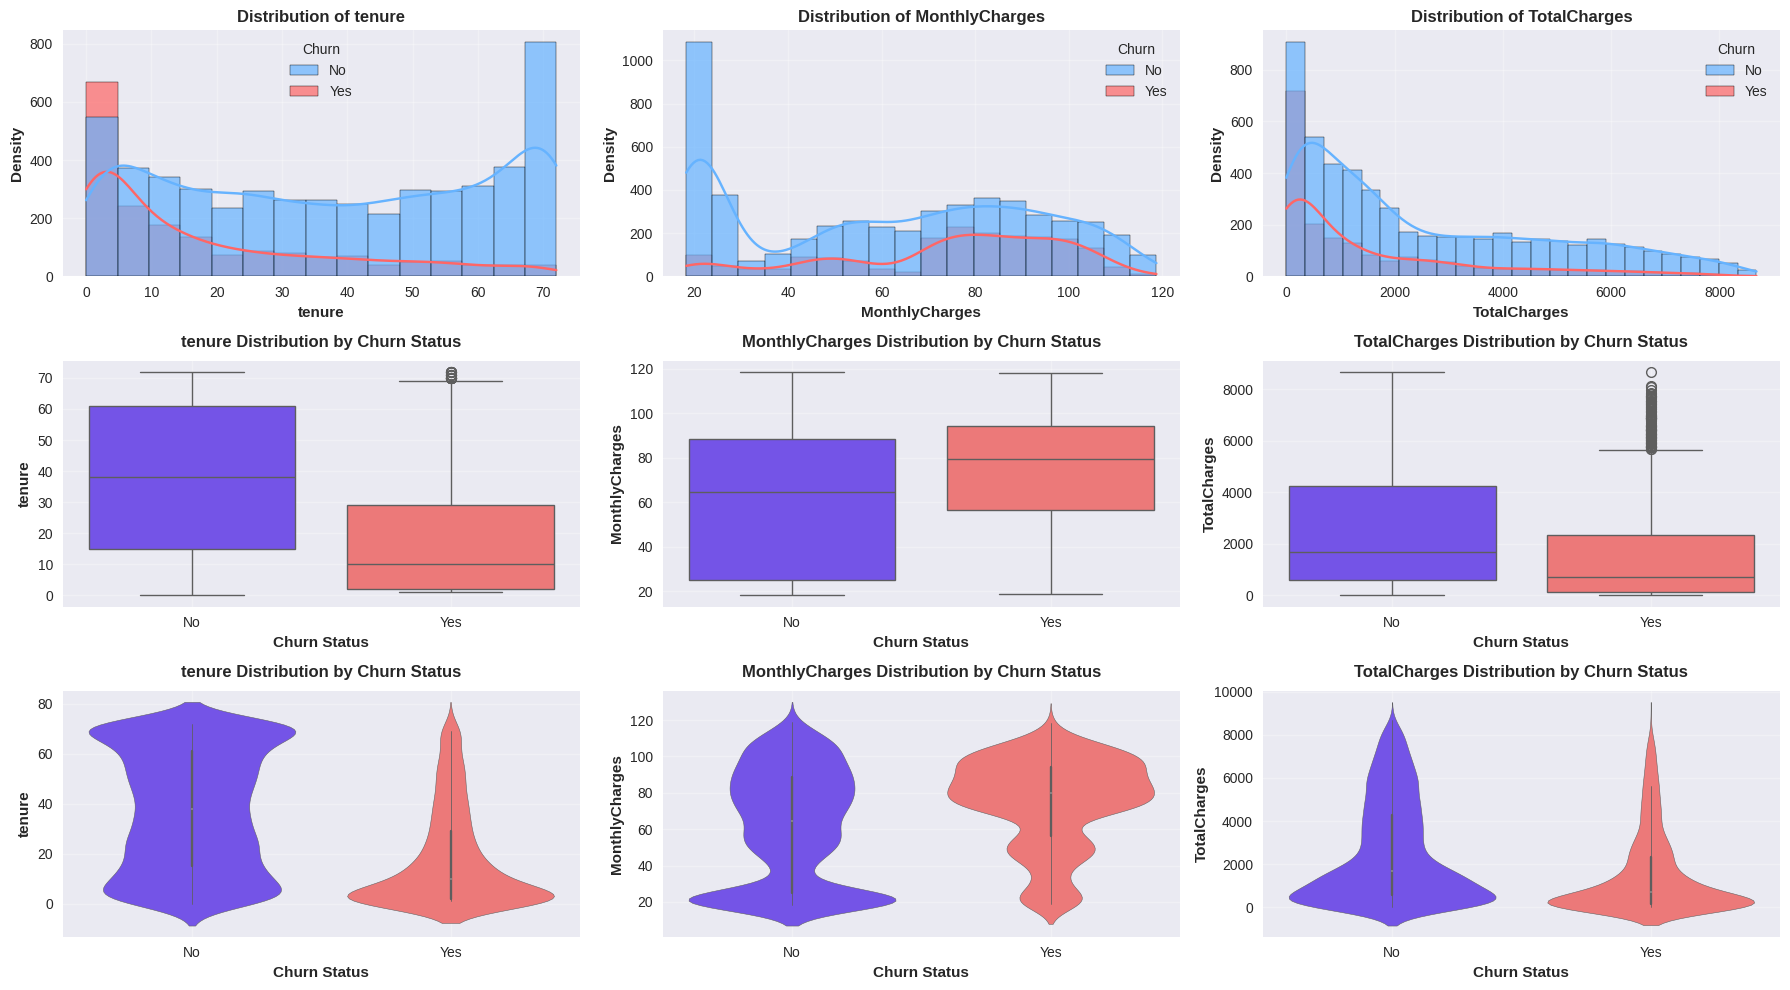


TENURE: 
T-test: t-statistic = -34.67, p-value =  0.0000
 Significant difference between churners and non-churners (p < 0.05)

MONTHLYCHARGES: 
T-test: t-statistic =  18.52, p-value =  0.0000
 Significant difference between churners and non-churners (p < 0.05)

TOTALCHARGES: 
T-test: t-statistic = -18.56, p-value =  0.0000
 Significant difference between churners and non-churners (p < 0.05)
Number of categorical variables: 16


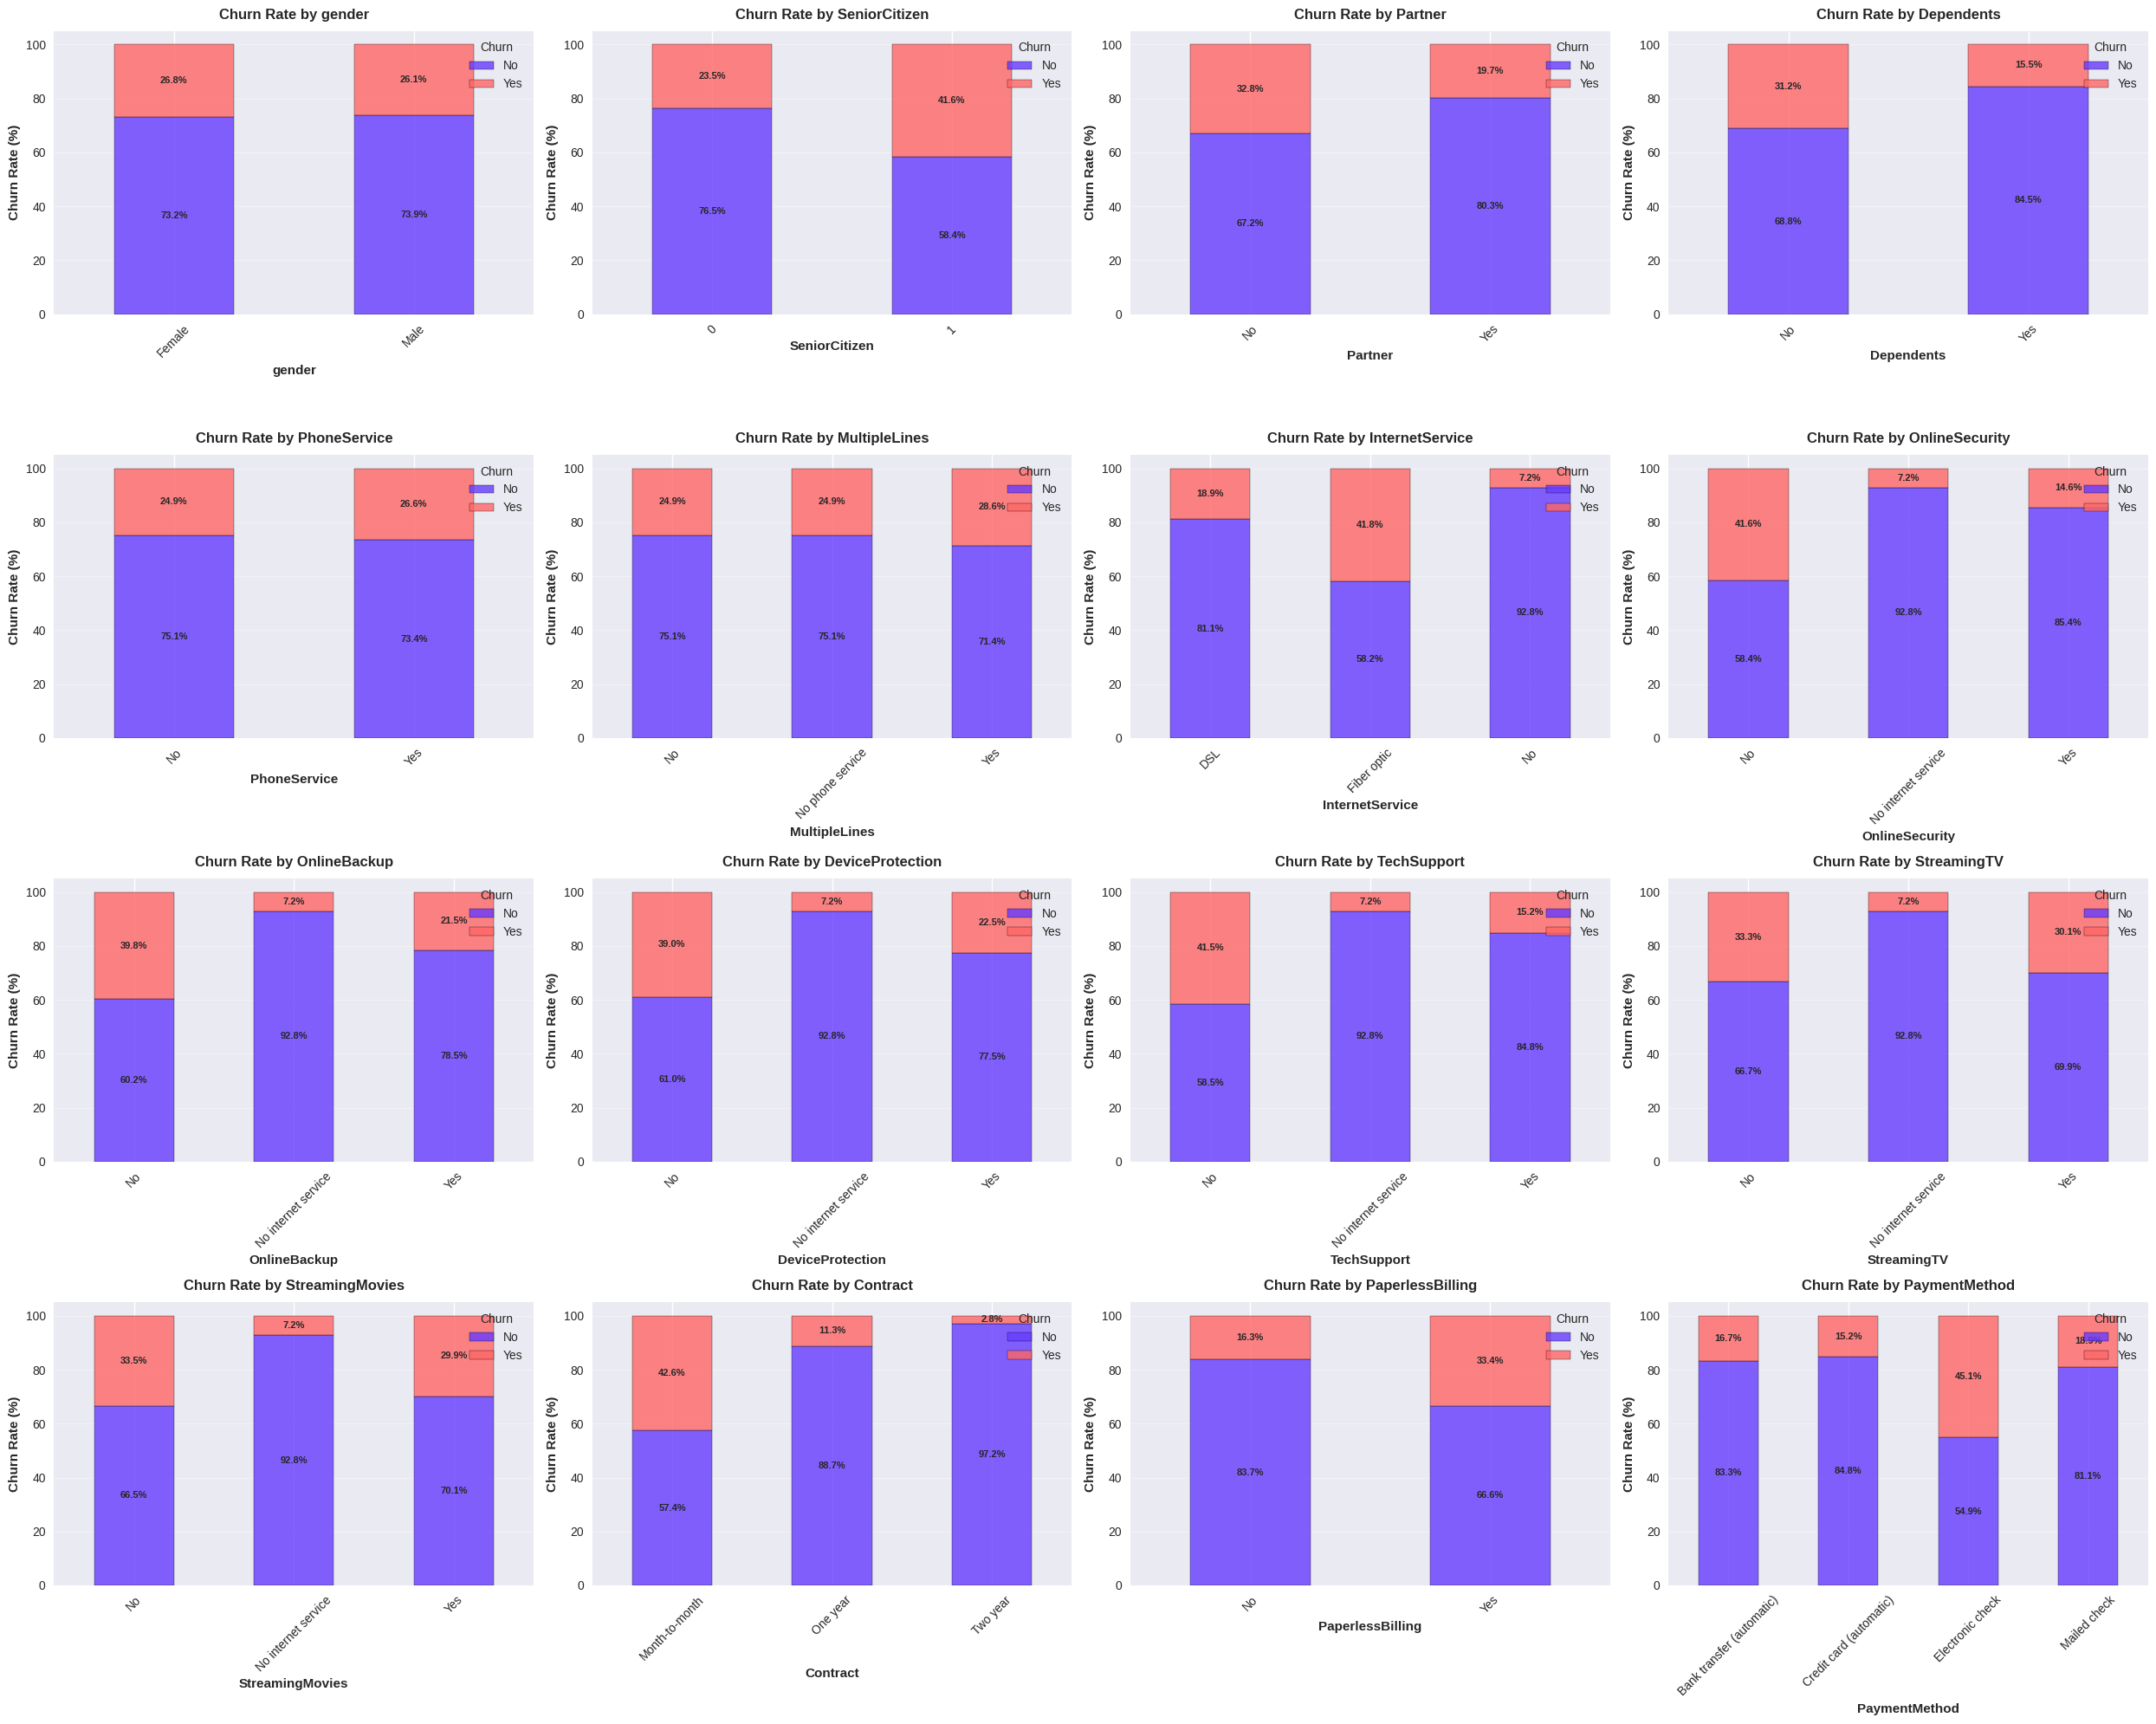


InternetService: 
 Highest Risk: Fiber optic (41.8% churn)
 Lowest Risk: No (7.2% churn)
 Risk Difference: 34.6%

PaymentMethod: 
 Highest Risk: Electronic check (45.1% churn)
 Lowest Risk: Credit card (automatic) (15.2% churn)
 Risk Difference: 29.9%

TechSupport: 
 Highest Risk: No (41.5% churn)
 Lowest Risk: No internet service (7.2% churn)
 Risk Difference: 34.3%

OnlineSecurity: 
 Highest Risk: No (41.6% churn)
 Lowest Risk: No internet service (7.2% churn)
 Risk Difference: 34.4%

SeniorCitizen: 
 Highest Risk: 1 (41.6% churn)
 Lowest Risk: 0 (23.5% churn)
 Risk Difference: 18.1%
 Senior Citizens (1): 41.6% churn rate
 Non-Senior Citizens (0): 23.5% churn rate
 Seniors are 1.8 x more likely to churn
 1. MonthlyCharges         0.195 (increases churn)
 2. PaperlessBilling       0.191 (increases churn)
 3. SeniorCitizen          0.152 (increases churn)
 4. PaymentMethod          0.106 (increases churn)
 5. MultipleLines          0.040 (increases churn)
 6. PhoneService           0.

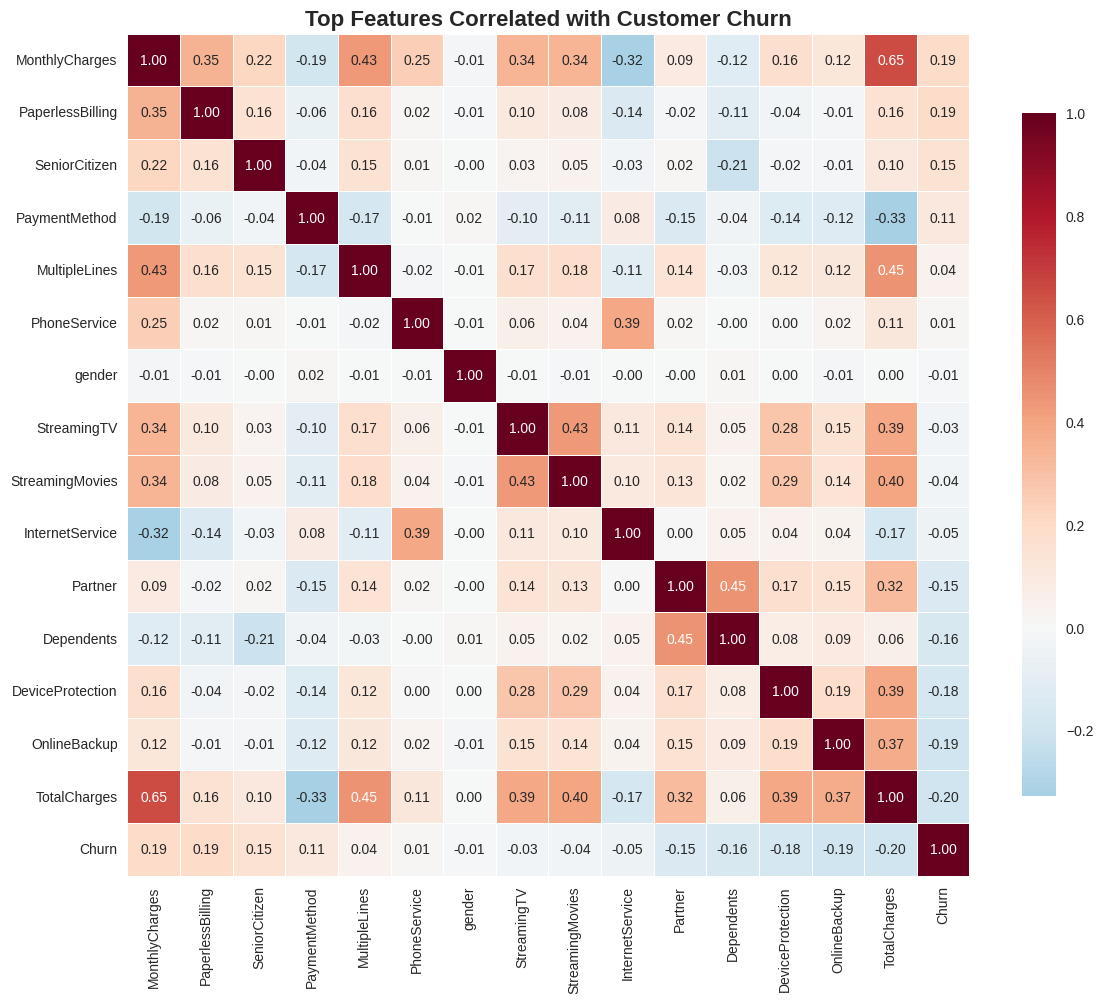

In [5]:
#5.1. Target variable analysis
("Target variable analysis: ")
churn_counts = df_clean['Churn'].value_counts()
churn_percentage = df_clean['Churn'].value_counts(normalize=True) * 100

("Churn Distribution: ")
print(f" No Churn: {churn_counts['No']:>6,} customers ({churn_percentage['No']:.1f}%)")
print(f" Churn: {churn_counts['Yes']:>6,} customers ({churn_percentage['Yes']:.1f}%)")
print(f" Imbalance Ratio: {churn_counts['No']/churn_counts['Yes']:.1f}:1")

#Visualization
plt.figure(figsize=(18,6))

#Pie chart
plt.subplot(1,3,1)
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff', '#ff6666'], explode=[0, 0.1])
plt.title('Customer Churn Distribution\n(Class Imbalance)', fontsize=14, fontweight='bold', pad=20)

#Count plot
plt.subplot(1,3,2)
ax = sns.countplot(data=df_clean, x='Churn', palette={'No': '#66b3ff', 'Yes': '#ff6666'})
plt.title('Churn Count Distribution', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Churn Status', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')

#Value annotations on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}\n({p.get_height()/len(df_clean)*100:,.1f}%)',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0,10),
                textcoords='offset points', fontweight='bold')

#Bar plit with percentages
plt.subplot(1,3,3)
sns.boxplot(data=df_clean, x='Churn', y='MonthlyCharges', palette={'No': '#663bff', 'Yes': '#ff6666'})
plt.title('Monthly Charges by Churn Status', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Churn Status', fontweight='bold')
plt.ylabel('Monthly Charges ($)', fontweight='bold')

plt.tight_layout()
plt.show()

#5.2. Numerical Variables Analysis
("Numerical Variables Analysis: ")

numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
("Numerical Columns: " + str(numerical_cols))

# Statistical Summary
("Statistical Summary: ")
display(df_clean[numerical_cols].describe())

#Visualize distributions
fig, axes = plt.subplots(3,3, figsize=(18, 10))

for i, col in enumerate(numerical_cols):
  #Histogram
  sns.histplot(data=df_clean, x=col, hue='Churn', kde=True,
               ax=axes[0,i], palette={'No': '#66b3ff', 'Yes': '#ff6666'}, alpha=0.7)
  axes[0,i].set_title(f'Distribution of {col}', fontweight='bold')
  axes[0,i].set_xlabel(col, fontweight='bold')
  axes[0,i].set_ylabel('Density', fontweight='bold')
  axes[0,i].grid(alpha=0.3)

  #Box plots
  sns.boxplot(data=df_clean, x='Churn', y=col,
              ax=axes[1,i], palette={'No': '#663bff', 'Yes': '#ff6666'})
  axes[1, i].set_title(f'{col} Distribution by Churn Status', fontweight='bold', pad=10)
  axes[1, i].set_xlabel('Churn Status', fontweight='bold')
  axes[1, i].set_ylabel(col, fontweight='bold')
  axes[1, i].grid(alpha=0.3)

  #Violin plots
  sns.violinplot(data=df_clean, x='Churn', y=col,
                 ax=axes[2,i], palette={'No': '#663bff', 'Yes': '#ff6666'})
  axes[2, i].set_title(f'{col} Distribution by Churn Status', fontweight='bold', pad=10)
  axes[2, i].set_xlabel('Churn Status', fontweight='bold')
  axes[2, i].set_ylabel(col, fontweight='bold')
  axes[2, i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

#Statistical tests for significance
("Statistical Tests: ")
for col in numerical_cols:
    print(f"\n{col.upper()}: ")
    churn_stats = df_clean.groupby('Churn')[col].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
    (churn_stats)

    churn_yes = df_clean[df_clean['Churn'] == 'Yes'][col]
    churn_no = df_clean[df_clean['Churn'] == 'No'][col]

    #T-test
    t_stat, p_val = stats.ttest_ind(churn_yes, churn_no, equal_var=False)
    print(f"T-test: t-statistic = {t_stat: .2f}, p-value = {p_val: .4f}")
    if p_val < 0.05:
      print(" Significant difference between churners and non-churners (p < 0.05)")
    else:
      print(" No Significant difference between churn groups")


#5.3. Categorical Variables Analysis
("Categorical Variables Analysis: ")

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

print(f"Number of categorical variables: {len(categorical_cols)}")

#Analyse each categorical variable
fig, axes = plt.subplots(4,4,figsize=(25,20))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
  #Create cross tabulation
  cross_tab = pd.crosstab(df_clean[col], df_clean['Churn'], normalize='index')*100

  #Plot
  bars = cross_tab.plot(kind='bar', ax=axes[i], stacked=True,
                        color=['#663bff','#ff6666'], edgecolor='black', alpha=0.8)
  axes[i].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold', pad=10)
  axes[i].set_xlabel(col, fontweight='bold')
  axes[i].set_ylabel('Churn Rate (%)', fontweight='bold')
  axes[i].tick_params(axis='x', rotation=45)
  axes[i].legend(title='Churn', loc='upper right')
  axes[i].grid(axis='y', alpha=0.3)

  #Add Percentage Annotations
  for container in axes[i].containers:
    axes[i].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8, fontweight='bold')


plt.tight_layout()
plt.show()

#Key insights from categorical analysis
("Key Insights from categorical variables: ")

#Calculate Churn rates for key variables
key_categories = ['Contracts', 'InternetService', 'PaymentMethod',
                  'TechSupport', 'OnlineSecurity', 'SeniorCitizen']

("Risk Factors")

for var in key_categories:
  if var in df_clean.columns:
    churn_rates = df_clean.groupby(var)['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
    max_churn_category = churn_rates.idxmax()
    max_churn_rate = churn_rates.max()
    min_churn_category = churn_rates.idxmin()
    min_churn_rate = churn_rates.min()

    print(f"\n{var}: ")
    print(f" Highest Risk: {max_churn_category} ({max_churn_rate:.1f}% churn)")
    print(f" Lowest Risk: {min_churn_category} ({min_churn_rate:.1f}% churn)")
    print(f" Risk Difference: {max_churn_rate - min_churn_rate:.1f}%")

#Special analysis for Senior Citizens
if 'SeniorCitizen' in df_clean.columns:
  ("Senior Citizen Analysis: ")
  senior_churn_rates = df_clean.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
  print(f" Senior Citizens (1): {senior_churn_rates[1]:.1f}% churn rate")
  print(f" Non-Senior Citizens (0): {senior_churn_rates[0]:.1f}% churn rate")
  print(f" Seniors are {senior_churn_rates[1]/senior_churn_rates[0]:.1f} x more likely to churn")


#5.4. Correlation Analysis
('Correlation Analysis: ')

#Prepare dataset for correlation
df_corr = df_clean.copy()

#Encode the categorical variables
for col in df_corr.select_dtypes(include=['object']).columns:
  if col != 'Churn':
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

#Encode target
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

#Calculate correlation matrix
corr_matrix = df_corr.corr()
churn_correlations = corr_matrix['Churn'].sort_values(ascending=False)

("Top 10 Features Correlated with Churn: ")
for i, (feature, corr) in enumerate(churn_correlations.head(11).items()):
  if feature != 'Churn':
    direction = "increases" if corr > 0 else "decreases"
    print(f"{i:2d}. {feature:20} {corr:7.3f} ({direction} churn)")

#Visualize correlation heatmap
plt.figure(figsize=(12,10))
top_features = churn_correlations.drop('Churn').head(15).index.tolist()
top_features.append('Churn')
focused_corr = corr_matrix.loc[top_features, top_features]
sns.heatmap(focused_corr, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Top Features Correlated with Customer Churn', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [6]:
("Data Preparation for modeling")

#Create a copy for modeling
df_model = df_clean.copy()

print("Original dataset shape: " + str(df_model.shape))
print("Original features: " + str(df_model.columns))

#Handle categorical variables
print("\nEncoding Categorical Variables: ")

#Binary columns - label encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
print(f"Binary columns for Label Encoding: {binary_cols}")

label_encoder = LabelEncoder()
for col in binary_cols:
  df_model[col] = label_encoder.fit_transform(df_model[col])
  print(f" {col}: {label_encoder.classes_} -> {label_encoder.transform(label_encoder.classes_)}")

#Multi-category columns - one-hot encoding
multi_category_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                          'Contract', 'PaymentMethod']

print(f"\nMulti-category columns for One-Hot Encoding: {multi_category_columns}")

#Perform One-Hot Encoding
df_model = pd.get_dummies(df_model, columns=multi_category_columns, drop_first=True)

#Encode target variable
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

print(f"\nDataset shape after encoding: {df_model.shape}")
print(f"Features after encoding: {df_model.shape[1]}")

#Prepare features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print(f"\nFeature matrix (X) shape: {X.shape}")
print(f"Target vector (y) shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")

#Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-Test Split Results: ")
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Churn distribution in training: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Churn distribution in test: {y_test.value_counts(normalize=True).to_dict()}")

Original dataset shape: (7021, 20)
Original features: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

Encoding Categorical Variables: 
Binary columns for Label Encoding: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
 gender: ['Female' 'Male'] -> [0 1]
 Partner: ['No' 'Yes'] -> [0 1]
 Dependents: ['No' 'Yes'] -> [0 1]
 PhoneService: ['No' 'Yes'] -> [0 1]
 PaperlessBilling: ['No' 'Yes'] -> [0 1]

Multi-category columns for One-Hot Encoding: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Dataset shape after encoding: (7021, 31)
Features after encoding: 31

Featu

In [7]:
("Handling Class Imbalance: ")

("Before handling class imbalance using SMOTE: ")
print(f" Class 0 (No Churn): {sum(y_train == 0):,} samples")
print(f" Class 1 (Churn): {sum(y_train == 1):,} samples")
print(f" Churn rate: {sum(y_train == 1)/len(y_train)*100:.1f}%")

#Apply SMOTE
("Applying SMOTE to balance classes")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

("\nAfter applying SMOTE: ")
print(f" Class 0 (No Churn): {sum(y_train_balanced == 0):,} samples")
print(f" Class 1 (Churn): {sum(y_train_balanced == 1):,} samples")
print(f" Churn rate: {sum(y_train_balanced == 1)/len(y_train_balanced)*100:.1f}%")
print(f" Synthetic samples created: {sum(y_train_balanced == 1) - sum(y_train == 1):,}")

 Class 0 (No Churn): 4,131 samples
 Class 1 (Churn): 1,485 samples
 Churn rate: 26.4%
 Class 0 (No Churn): 4,131 samples
 Class 1 (Churn): 4,131 samples
 Churn rate: 50.0%
 Synthetic samples created: 2,646


In [8]:
("Feature Scaling: ")

#Scale Features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

#Keep unscaled version for Decision Tree
X_train_unscaled = X_train_balanced
X_test_unscaled = X_test

("Feature scaling completed: ")
print(f" Scaled training set shape: {X_train_scaled.shape}")
print(f" Scaled test set shape: {X_test_scaled.shape}")
print(f" Unscaled training set shape: {X_train_unscaled.shape}")
print(f" Unscaled test set shape: {X_test_unscaled.shape}")

#Convert back to DataFrames for better handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train_balanced.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns, index=X_train_balanced.index)
X_test_unscaled_df = pd.DataFrame(X_test_unscaled, columns=X.columns, index=X_test.index)

("\nData Preparation Summary")
(" X_train_scaled: For Neural Network (scaled features)")
(" X_train_unscaled: For Decision Tree (original features)")
(" Both training sets are balanced using SMOTE")
(" Test sets remain unchanged for fair evaluation")

 Scaled training set shape: (8262, 30)
 Scaled test set shape: (1405, 30)
 Unscaled training set shape: (8262, 30)
 Unscaled test set shape: (1405, 30)


' Test sets remain unchanged for fair evaluation'

This may take a few minutes...
 Parameter Grid: {'max_depth': [3, 5, 7, 10, 15, 20, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 8], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2', None]}
Fitting 5 folds for each of 1120 candidates, totalling 5600 fits
 Grid Search Complete!
 criterion: gini
 max_depth: 10
 max_features: None
 min_samples_leaf: 1
 min_samples_split: 5
 Best Cross-Validation F1 Score: 0.8096


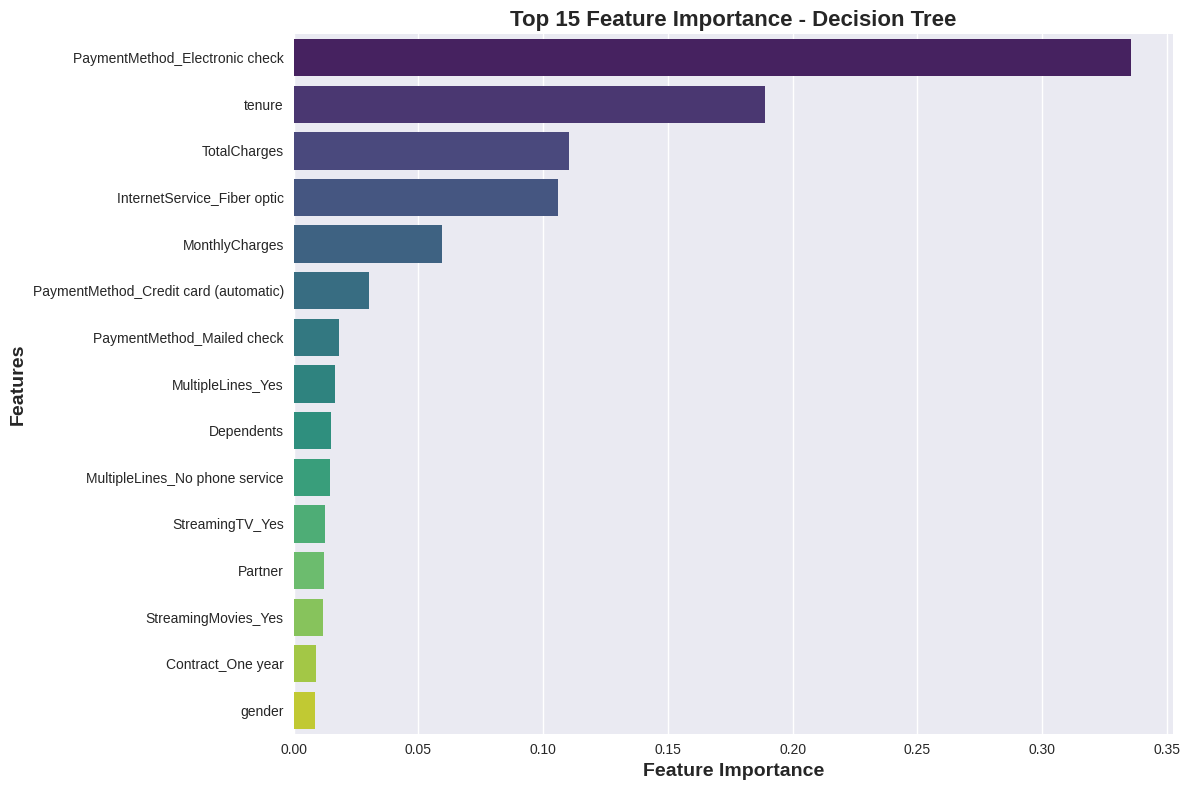

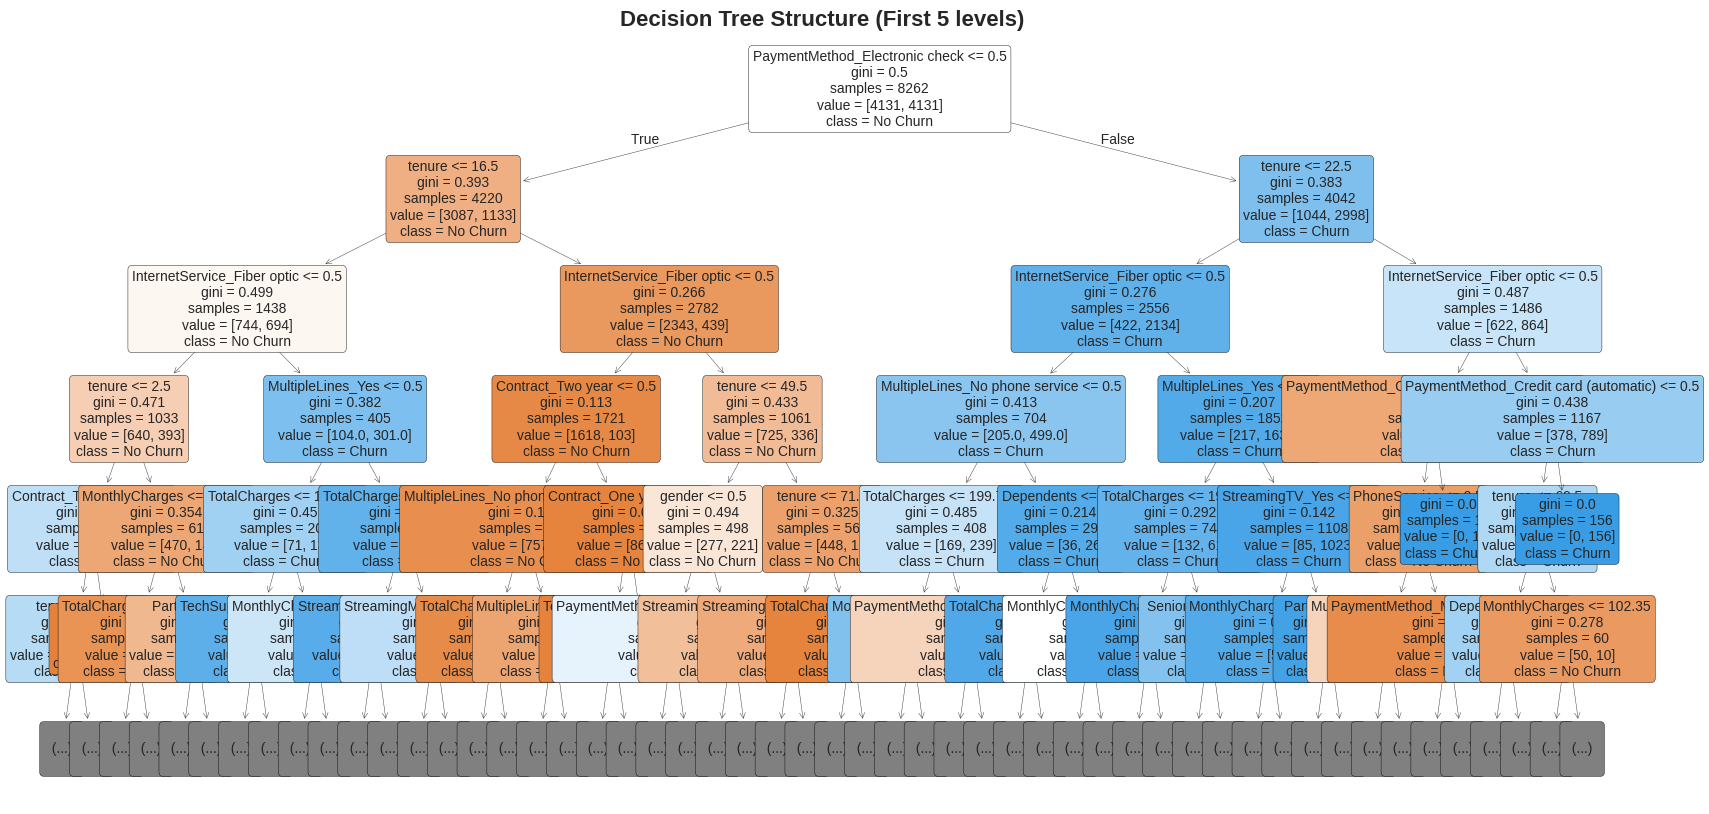

In [9]:
("Model 1: Decision Tree Classifier")

#Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

#Compressive parameter grid
param_grid_dt = {
    'max_depth': [3,5,7,10,15,20, None],
    'min_samples_split': [2,5,10,15,20],
    'min_samples_leaf': [1,2,4,8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

("Performing Grid Search for Decision Tree")
print("This may take a few minutes...")
print(f" Parameter Grid: {param_grid_dt}")

#Grid Search with cross-validation
grid_search_dt = GridSearchCV(
    dt_classifier, param_grid_dt, cv=5, scoring='f1', n_jobs=-1, verbose=1
)

#Fit in unscaled data as Decision Trees do not require scaled data
("Starting Grid Search")
grid_search_dt.fit(X_train_unscaled_df, y_train_balanced)
print(" Grid Search Complete!")

#Best parameter and score
("Grid Search Complete")
("Best Decision Tree Parameters: ")
for param, value in grid_search_dt.best_params_.items():
  print(f" {param}: {value}")
print(f" Best Cross-Validation F1 Score: {grid_search_dt.best_score_:.4f}")

#Best Model
best_dt_model = grid_search_dt.best_estimator_

#Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt_model.feature_importances_
}).sort_values('importance', ascending=False)

("Top 10 most important features")
feature_importance.head(10)

#Visualize feature importance
plt.figure(figsize=(12,8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importance - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#Plot the Decision Tree (Simplified Version)
plt.figure(figsize=(20,10))
plot_tree(best_dt_model,
          feature_names=X.columns,
          class_names=['No Churn','Churn'],
          filled=True,
          rounded=True,
          max_depth=5, #show only the first 5 levels
          fontsize=10)
plt.title('Decision Tree Structure (First 5 levels)', fontsize=16, fontweight='bold')
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,809 (61.75 KB)

 Trainable params: 15,329 (59.88 KB)

 Non-trainable params: 480 (1.88 KB)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - Precision: 0.5068 - Recall: 0.5659 - accuracy: 0.6232 - loss: 14.2552 - val_Precision: 1.0000 - val_Recall: 0.0351 - val_accuracy: 0.0351 - val_loss: 7.1671 - learning_rate: 0.0010
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Precision: 0.6788 - Recall: 0.5854 - accuracy: 0.7439 - loss: 5.2655 - val_Precision: 1.0000 - val_Recall: 0.0145 - val_accuracy: 0.0145 - val_loss: 2.9251 - learning_rate: 0.0010
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.7086 - Recall: 0.5681 - accuracy: 0.7545 - loss: 1.9505 - val_Precision: 1.0000 - val_Recall: 0.0018 - val_accuracy: 0.0018 - val_loss: 1.8336 - learning_rate: 0.0010
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Precision: 0.7185 - Recall: 0.6314 - accuracy: 0.7704 - loss: 1.0500 - val_Precision: 1.0000 - val_Recall: 0.7489 - val_accuracy: 0.7489 - val_loss: 0.9650 - learning_rate: 0.0010
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Prec

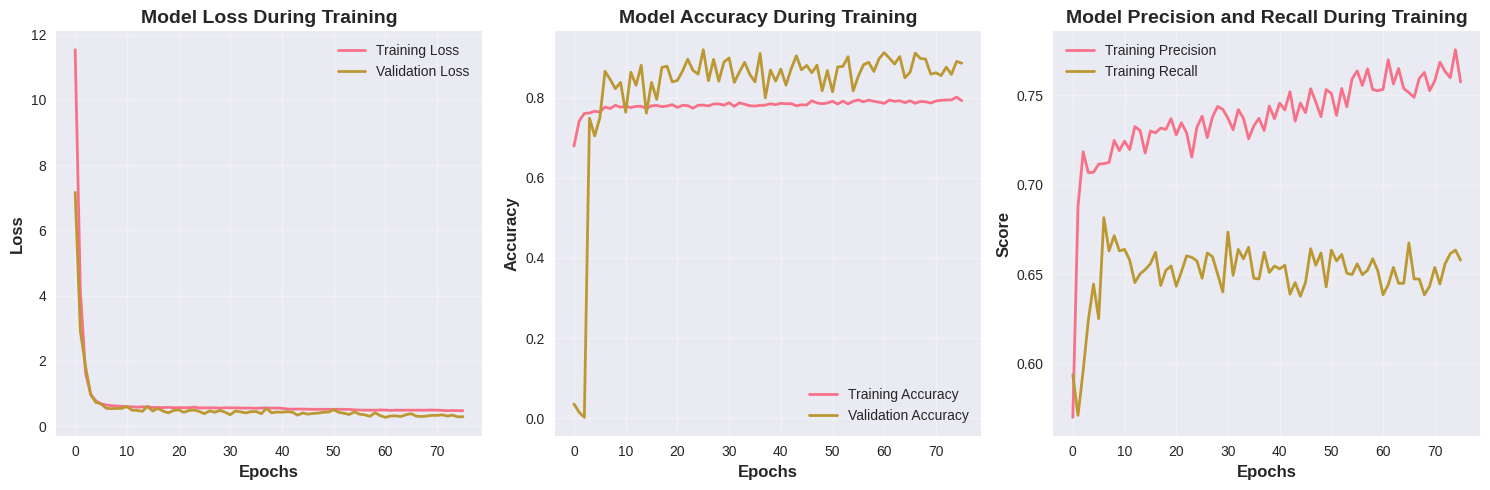

 Training stopped at epoch 76
 Final Training Loss: 0.4731
 Final Validation Loss: 0.2888


In [10]:
("Model 2: Neural Network Classifier")

("Building the Neural Network Architecture")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2

def create_nn_model(learning_rate=0.001, dropout_rate=0.3, l1_reg=0.01, l2_reg=0.01):
  model = Sequential([
      #Input Layer
      Dense(128, activation='relu',
            input_shape=(X_train_scaled_df.shape[1],),
            kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
      BatchNormalization(),
      Dropout(dropout_rate),

      #Hidden Layer
      Dense(64, activation='relu',
            kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
      BatchNormalization(),
      Dropout(dropout_rate),

      Dense(32, activation='relu',
            kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
      BatchNormalization(),
      Dropout(dropout_rate),

      Dense(16, activation='relu',
            kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)),
      BatchNormalization(),
      Dropout(dropout_rate),

      #Output Layer
      Dense(1, activation='sigmoid')
  ])

  #Custom Optimizer
  optimizer = Adam(learning_rate=learning_rate)

  model.compile(
      optimizer=optimizer,
      loss='binary_crossentropy',
      metrics=['accuracy', 'Precision', 'Recall']
  )

  return model

#Create the model
nn_model = create_nn_model()

("Neural Network Architecture Created!")
("Model Summary: ")
nn_model.summary()

#Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.0001,
    verbose=1
)

("\nTraining Neural Network")

#Train Model
history = nn_model.fit(
    X_train_scaled_df, y_train_balanced,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

("Neural Network training completed!")

#Plot training history
plt.figure(figsize=(15,5))

#Loss
plt.subplot(1,3,1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

#Accuracy
plt.subplot(1,3,2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

#Precision_Recall
plt.subplot(1,3,3)
plt.plot(history.history['Precision'], label='Training Precision', linewidth=2)
plt.plot(history.history['Recall'], label='Training Recall', linewidth=2)
plt.title('Model Precision and Recall During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f" Training stopped at epoch {len(history.history['loss'])}")
print(f" Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f" Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 Comprehensive Evaluation for Decision Tree

Performance Metrics: 
 Accuracy: 0.7302
 Precision: 0.4923
 Recall: 0.6048
 F1 Score: 0.5428
 ROC-AUC: 0.7306
              precision    recall  f1-score   support

    No Churn       0.84      0.78      0.81      1033
       Churn       0.49      0.60      0.54       372

    accuracy                           0.73      1405
   macro avg       0.67      0.69      0.68      1405
weighted avg       0.75      0.73      0.74      1405



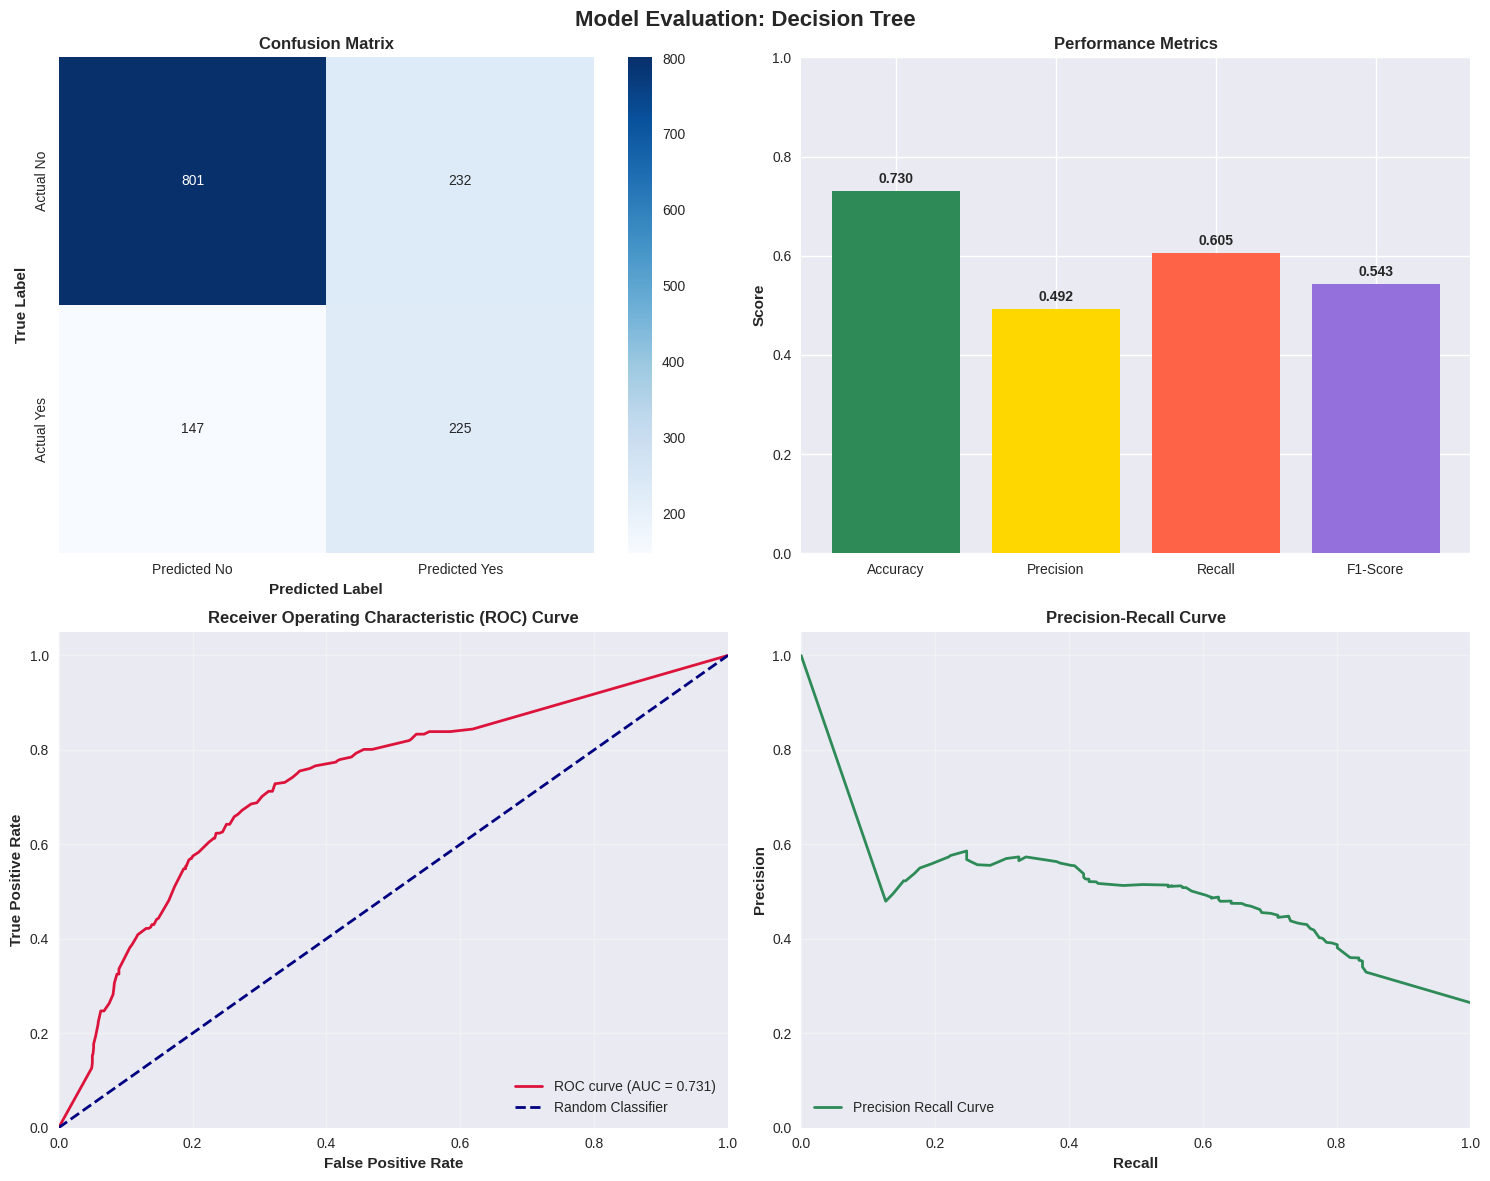

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 Comprehensive Evaluation for Neural Network

Performance Metrics: 
 Accuracy: 0.7694
 Precision: 0.5594
 Recall: 0.6075
 F1 Score: 0.5825
 ROC-AUC: 0.8301
              precision    recall  f1-score   support

    No Churn       0.85      0.83      0.84      1033
       Churn       0.56      0.61      0.58       372

    accuracy                           0.77      1405
   macro avg       0.71      0.72      0.71      1405
weighted avg       0.78      0.77      0.77      1405



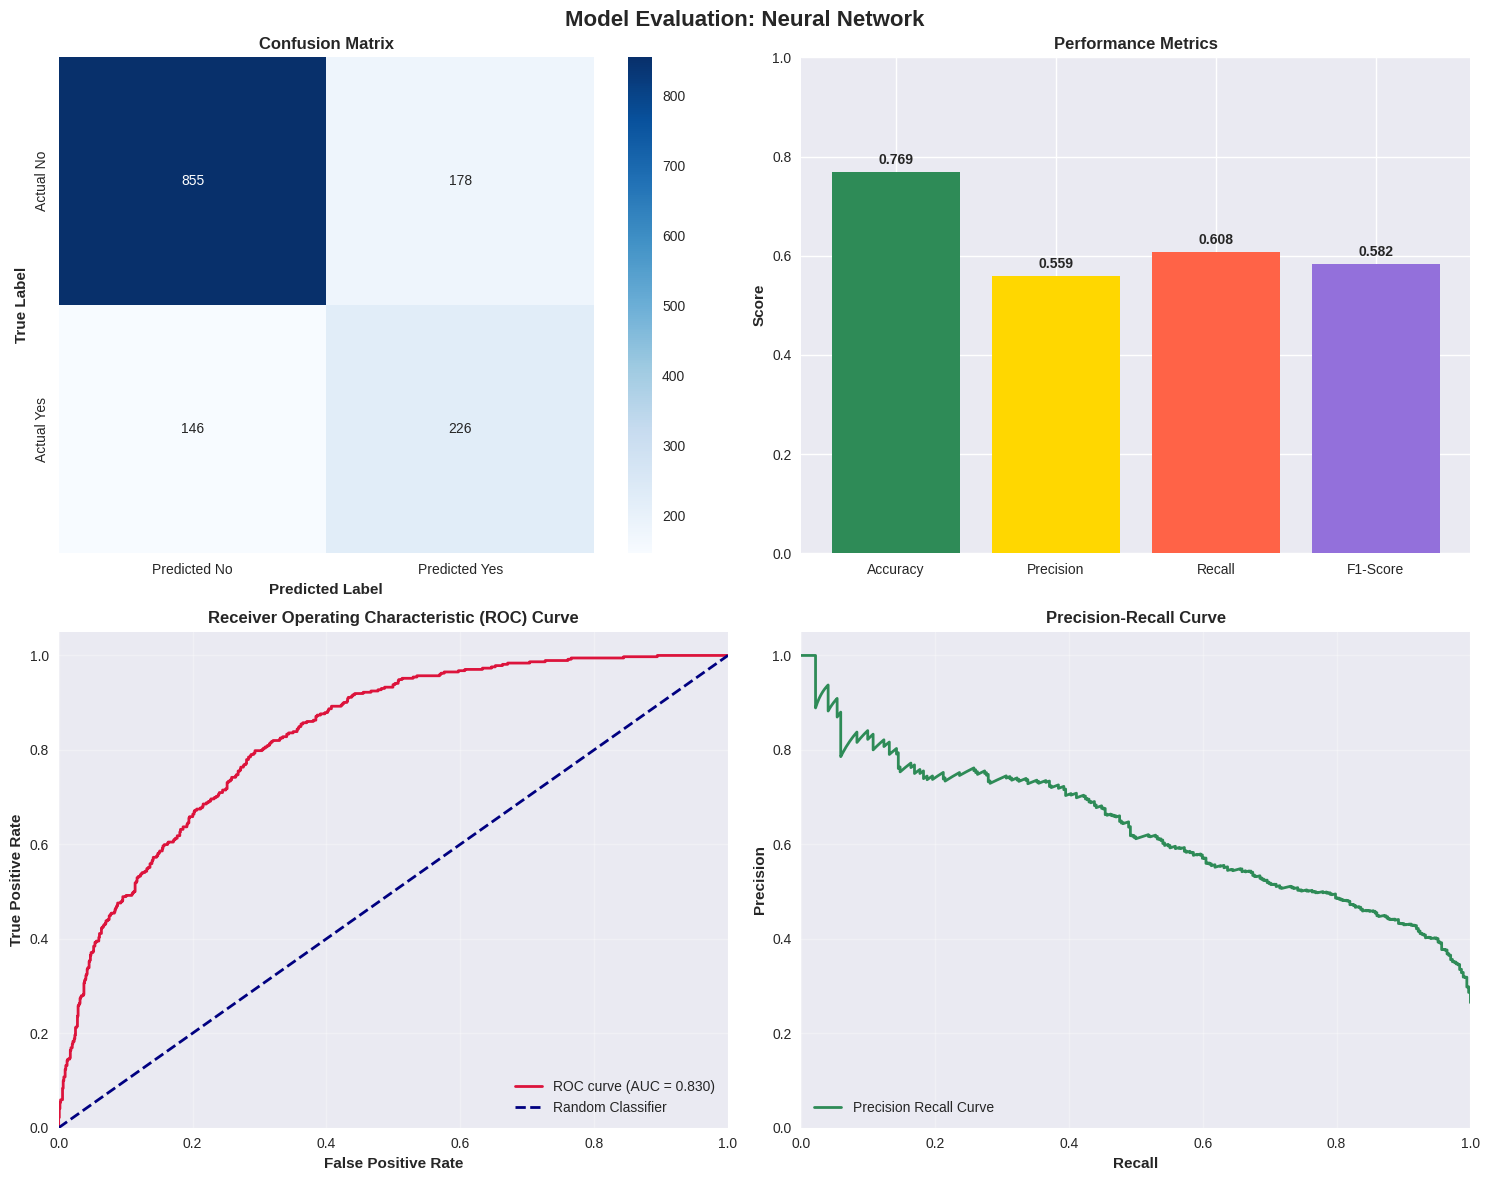

In [11]:
("Model Evaluation and Comparison")

#Make predictions
y_pred_dt = best_dt_model.predict(X_test_unscaled_df)
y_pred_nn = (nn_model.predict(X_test_scaled_df) > 0.5).astype("int32").flatten()

("Predictions generated for both models")

#Comprehensive evaluation function
def comprehensive_evaluation(y_true, y_pred, y_pred_proba=None, model_name=""):
  print(f" Comprehensive Evaluation for {model_name}")

  #Calculate Metrics
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  auc = roc_auc_score(y_true, y_pred_proba) if y_pred_proba is not None else roc_auc_score(y_true, y_pred)

  print(f"\nPerformance Metrics: ")
  print(f" Accuracy: {accuracy:.4f}")
  print(f" Precision: {precision:.4f}")
  print(f" Recall: {recall:.4f}")
  print(f" F1 Score: {f1:.4f}")
  print(f" ROC-AUC: {auc:.4f}")

  #Classification Report
  ("Classification Report")
  print(classification_report(y_true, y_pred, target_names=['No Churn', 'Churn']))

  #Create visualizations
  fig, axes = plt.subplots(2,2, figsize=(15,12))
  fig.suptitle(f'Model Evaluation: {model_name}', fontsize=16, fontweight='bold')

  #Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
              xticklabels=['Predicted No', 'Predicted Yes'],
              yticklabels=['Actual No', 'Actual Yes'])
  axes[0,0].set_title('Confusion Matrix', fontweight='bold')
  axes[0,0].set_xlabel('Predicted Label', fontweight='bold')
  axes[0,0].set_ylabel('True Label', fontweight='bold')

  #Metrics Comparison
  metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
  scores = [accuracy, precision, recall, f1]
  bars = axes[0,1].bar(metrics, scores, color=['#2E8B57', '#FFD700', '#FF6347', '#9370DB'])
  axes[0,1].set_title('Performance Metrics', fontweight='bold')
  axes[0,1].set_ylabel('Score', fontweight='bold')
  axes[0,1].set_ylim(0,1)

  #Add value labels
  for bar, score in zip(bars, scores):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

  #ROC Curve
  if y_pred_proba is not None:
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    axes[1,0].plot(fpr, tpr, color='#DC143C', lw=2, label=f'ROC curve (AUC = {auc:.3f})')
    axes[1,0].plot([0,1], [0,1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    axes[1,0].set_xlim([0.0, 1.0])
    axes[1,0].set_ylim([0.0, 1.05])
    axes[1,0].set_xlabel('False Positive Rate', fontweight='bold')
    axes[1,0].set_ylabel('True Positive Rate', fontweight='bold')
    axes[1,0].set_title('Receiver Operating Characteristic (ROC) Curve', fontweight='bold')
    axes[1,0].legend(loc='lower right')
    axes[1,0].grid(alpha=0.3)

  #Precision Recall Curve
  if y_pred_proba is not None:
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_pred_proba)
    axes[1,1].plot(recall_curve, precision_curve, color='#2E8B57', lw=2, label=f"Precision Recall Curve")
    axes[1,1].set_xlim([0.0, 1.0])
    axes[1,1].set_ylim([0.0, 1.05])
    axes[1,1].set_xlabel('Recall', fontweight='bold')
    axes[1,1].set_ylabel('Precision', fontweight='bold')
    axes[1,1].set_title('Precision-Recall Curve', fontweight='bold')
    axes[1,1].legend(loc='lower left')
    axes[1,1].grid(alpha=0.3)

  plt.tight_layout()
  plt.show()

  return {'accuracy': accuracy,
          'precision': precision,
          'recall': recall,
          'f1': f1,
          'auc': auc}

#Evaluate Decision Tree
("Evaluating Decision Tree")
y_pred_proba_dt = best_dt_model.predict_proba(X_test_unscaled_df)[:,1]
dt_metrics = comprehensive_evaluation(y_test, y_pred_dt, y_pred_proba_dt, "Decision Tree")

#Evaluate Neural Network
("Evaluating Neural Network")
y_pred_proba_nn = nn_model.predict(X_test_scaled_df).flatten()
nn_metrics = comprehensive_evaluation(y_test, y_pred_nn, y_pred_proba_nn, "Neural Network")

In [19]:
# --- GITHUB PUSH VIA SSH IN COLAB ---

# 1️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Paths
notebook_path = "/content/drive/MyDrive/Colab Notebooks/CM2604_2425606_PreTest.ipynb"
repo_folder = "/content/drive/MyDrive/Colab Notebooks/Churn_Test"
ssh_key_file = "/root/.ssh/id_rsa"

import os

# 3️⃣ Clone repo if not already cloned
repo_ssh_url = "git@github.com:Saniru2006/Churn_Test.git"
if not os.path.exists(repo_folder):
    # Generate SSH key
    !ssh-keygen -t rsa -b 4096 -f {ssh_key_file} -N ""

    # Show public key for GitHub
    print("Copy this SSH public key and add it to GitHub (Settings → SSH and GPG keys → New SSH key):\n")
    !cat {ssh_key_file}.pub

    # Make sure SSH known hosts is set
    !ssh-keyscan github.com >> /root/.ssh/known_hosts

    # Clone repo via SSH
    !git clone {repo_ssh_url} "{repo_folder}"

# 4️⃣ Copy notebook into repo
!cp "{notebook_path}" "{repo_folder}/"

# 5️⃣ Go into repo folder
%cd "{repo_folder}"

# 6️⃣ Git config
!git config --global user.email "saniruuthsaralk1@gmail.com"
!git config --global user.name "Saniru2006"

# 7️⃣ Commit and push
!git add .
!git commit -m "Add churn analysis notebook"
!git push origin main


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Churn_Test
On branch main
Your branch is based on 'origin/main', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
